<a href="https://colab.research.google.com/github/nimsara66/ML-Project/blob/main/test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For Label 1

## Data Visualization

In [ ]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/ML/speech-based-classification-layer-9/train.csv"
data = pd.read_csv(csv_url)
data.head()

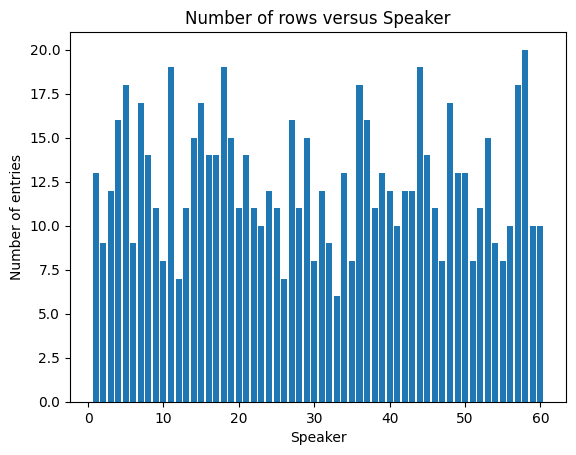

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_label(y, title, x_title, y_title='Number of entries'):
  unique_classes, class_counts = np.unique(y, return_counts=True)
  plt.bar(unique_classes, class_counts)
  plt.xlabel(x_title)
  plt.ylabel(y_title)
  plt.title(title)
  plt.show()

visualize_label(data['label_1'], "Number of rows versus Speaker","Speaker")

## Import Train Dataset

In [2]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/ML/speech-based-classification-layer-9/train.csv"
data = pd.read_csv(csv_url)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,45,NaN,1,6
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,45,NaN,1,6
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,45,NaN,1,6
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,45,NaN,1,6
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,45,NaN,1,6


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [4]:
print(f"data dataset shape {data.shape}")
print(f"# of missing values {data['label_1'].isna().sum()}")
print(f"# of labels {data['label_1'].value_counts().shape[0]}")
print(f"label summary\n{data['label_1'].value_counts()}")

data dataset shape (28520, 772)
# of missing values 0
# of labels 60
label summary
12    485
35    484
26    483
60    482
24    482
25    481
59    481
10    481
54    481
45    480
41    480
9     480
2     479
42    479
47    479
6     479
56    479
34    478
52    478
3     478
14    478
33    478
43    477
1     477
13    477
20    477
23    477
30    476
51    476
32    476
53    476
22    476
38    476
49    476
55    475
28    474
8     474
40    474
48    474
21    474
4     474
39    473
17    473
7     473
15    472
58    472
5     471
27    471
31    470
19    469
11    469
46    469
29    469
36    468
16    468
50    467
37    467
44    467
57    466
18    465
Name: label_1, dtype: int64


## Model

In [17]:
class SpeakerClassifier(nn.Module):
    def __init__(self, dropout_prob=0.5, weight_decay=1e-5):
        super(SpeakerClassifier, self).__init__()
        self.linear1 = nn.Linear(768, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 60)

        # Define dropout layers
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.dropout3 = nn.Dropout(p=dropout_prob)

        # Define L2 regularization (weight decay) for linear layers
        self.l2_regularization = nn.Linear(1, 1)  # Initialize a linear layer with weight 1

        # Set weight_decay for regularization
        self.weight_decay = weight_decay

    def forward(self, tensors):
        output_l1 = torch.relu(self.linear1(tensors))
        output_l2 = torch.relu(self.linear2(output_l1))
        output_l3 = torch.relu(self.linear3(output_l2))
        output_l4 = self.linear4(output_l3)
        return output_l4

    def l2_regularization_loss(self):
        # Calculate L2 regularization loss for linear layers
        l2_loss = 0.0
        for param in self.parameters():
            if param.requires_grad:
                l2_loss += torch.norm(param, 2)
        return self.weight_decay * l2_loss

In [6]:
from sklearn.preprocessing import OneHotEncoder

label_1 = data['label_1'].values.reshape(-1, 1)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(label_1)
print(ohe.categories_)

label_1 = ohe.transform(label_1)
print(label_1)

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :768], label_1, test_size=0.2, stratify=label_1, random_state=2023)

In [10]:
X_train_tensors = torch.tensor(X_train.iloc[:, :].values, dtype=torch.float32)
print(X_train_tensors.shape)

torch.Size([22816, 768])


In [11]:
X_test_tensors = torch.tensor(X_test.iloc[:, :].values, dtype=torch.float32)
print(X_test_tensors.shape)

torch.Size([5704, 768])


In [18]:
# Create an instance of the FakeBERT model
speakerClassifier = SpeakerClassifier()

# Define a cross-entropy loss function
criterion = nn.CrossEntropyLoss()

# Create a DataLoader for batching
batch_size = 128
dataset = TensorDataset(X_train_tensors, torch.tensor(y_train))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define an optimizer
optimizer = torch.optim.Adam(speakerClassifier.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):

    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = speakerClassifier(inputs)

        ce_loss = criterion(outputs, targets)
        l2_loss = speakerClassifier.l2_regularization_loss()

        total_loss = ce_loss + l2_loss

        total_loss.backward()
        optimizer.step()

    y_test_pred = speakerClassifier(X_test_tensors)
    ce = criterion(y_test_pred, torch.tensor(y_test))
    acc = (torch.argmax(y_test_pred, 1) == torch.argmax(torch.tensor(y_test), 1)).float().mean()
    print(f"Epoch {epoch} validation: Cross-entropy={float(ce)}, Accuracy={float(acc)}")

# Save the trained model if needed
# torch.save(speakerClassifier.state_dict(), 'speakerClassifier_model.pth')

Epoch 0 validation: Cross-entropy=1.7689894508893065, Accuracy=0.44670405983924866
Epoch 1 validation: Cross-entropy=1.1379308491368787, Accuracy=0.6530504822731018
Epoch 2 validation: Cross-entropy=0.9153981700963539, Accuracy=0.7182678580284119
Epoch 3 validation: Cross-entropy=0.7228394965821824, Accuracy=0.7775245308876038
Epoch 4 validation: Cross-entropy=0.5855990535401006, Accuracy=0.820652186870575
Epoch 5 validation: Cross-entropy=0.5595126628232242, Accuracy=0.8313464522361755
Epoch 6 validation: Cross-entropy=0.5012635414676212, Accuracy=0.8511570692062378
Epoch 7 validation: Cross-entropy=0.4975903183194353, Accuracy=0.8497545719146729
Epoch 8 validation: Cross-entropy=0.4297761796807343, Accuracy=0.8723702430725098
Epoch 9 validation: Cross-entropy=0.40256391422049714, Accuracy=0.8848176598548889
Epoch 10 validation: Cross-entropy=0.4200941192614123, Accuracy=0.8757012486457825
Epoch 11 validation: Cross-entropy=0.3795442719017187, Accuracy=0.8872721195220947
Epoch 12 vali

## Import Test Dataset

In [46]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/ML/speech-based-classification-layer-9/valid.csv"
data = pd.read_csv(csv_url)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,-0.130454,0.103857,0.130866,-0.036366,-0.152212,-0.072316,-0.041838,-0.019596,0.038727,0.022496,...,0.129246,0.018913,0.013387,-0.054259,0.006282,0.049646,45,NaN,1,6
1,0.019179,0.104888,0.079487,0.005187,-0.134111,-0.109271,0.054558,-0.083966,-0.000091,0.083015,...,-0.031823,0.061069,0.036411,0.101357,0.088504,0.008192,45,NaN,1,6
2,-0.028485,0.051889,0.033343,-0.029115,-0.091265,-0.038653,0.113460,-0.057983,0.128808,0.062455,...,-0.033106,-0.007366,-0.027673,0.052090,0.044097,0.054422,45,NaN,1,6
3,-0.078959,0.082325,0.068852,-0.028885,-0.146059,-0.071453,-0.028955,0.031253,0.034923,0.019338,...,0.164456,-0.025891,0.037993,0.012060,-0.044266,0.045405,45,NaN,1,6
4,0.001748,0.050968,-0.034524,0.074153,0.063857,-0.133338,0.102604,-0.031676,0.010629,-0.018684,...,-0.102749,0.022433,0.018421,0.086064,0.075351,-0.067089,45,NaN,1,6


In [47]:
from sklearn.preprocessing import OneHotEncoder

label_1 = data['label_1'].values.reshape(-1, 1)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(label_1)
print(ohe.categories_)

label_1 = ohe.transform(label_1)
print(label_1)

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [66]:
# Set your model to evaluation mode
speakerClassifier.eval()

X_test_tensors = torch.tensor(data.iloc[:, :768].values, dtype=torch.float32)
print(X_test_tensors.shape)

y_pred = speakerClassifier(X_test_tensors)
ce = criterion(y_pred, torch.tensor(label_1))
acc = (torch.argmax(y_pred, 1) == torch.argmax(torch.tensor(label_1), 1)).float().mean()
print(f"Cross-entropy={float(ce)}, Test Accuracy={float(acc)}")

torch.Size([750, 768])
Cross-entropy=0.3324918168544258, Test Accuracy=0.95333331823349


## Evaluation of the Model

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_labels = torch.argmax(y_pred, axis=1).numpy()
label_1_np = torch.argmax(torch.tensor(label_1), axis=1).numpy()

confusion = confusion_matrix(label_1_np, y_pred_labels)
print(classification_report(label_1_np, y_pred_labels))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.90      1.00      0.95         9
           2       0.92      0.92      0.92        12
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        18
           5       1.00      0.89      0.94         9
           6       0.94      0.94      0.94        17
           7       1.00      0.86      0.92        14
           8       1.00      0.91      0.95        11
           9       0.89      1.00      0.94         8
          10       0.95      0.95      0.95        19
          11       0.88      1.00      0.93         7
          12       1.00      0.82      0.90        11
          13       1.00      1.00      1.00        15
          14       0.94      0.88      0.91        17
          15       1.00      1.00      1.00        14
          16       1.00      0.86      0.92        14
          17       1.00    

## Use PCA to Reduce Feature Space

In [34]:
def pca_reduce(X,pca, first_fit=False):
  feature_names = X.columns
  if first_fit:
    X_train_pca = pca.fit_transform(X)
  else:
    X_train_pca = pca.transform(X)
  return pd.DataFrame(data=X_train_pca, columns=[X.columns[i] for i in range(X_train_pca.shape[1])])

In [35]:
from sklearn.decomposition import PCA

desired_variance_ratio = 0.95
pca = PCA(n_components=desired_variance_ratio, svd_solver='full')
X_train_after_reduction = pca_reduce(data.iloc[:, :768], pca, first_fit=True)

In [36]:
print(data.iloc[:, :768].shape)
print(X_train_after_reduction.shape)

(750, 768)
(750, 155)


In [38]:
class SpeakerClassifierReduced(nn.Module):
    def __init__(self, dropout_prob=0.5, weight_decay=1e-5):
        super(SpeakerClassifierReduced, self).__init__()
        self.linear1 = nn.Linear(155, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 60)

        # Define dropout layers
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.dropout3 = nn.Dropout(p=dropout_prob)

        # Define L2 regularization (weight decay) for linear layers
        self.l2_regularization = nn.Linear(1, 1)  # Initialize a linear layer with weight 1

        # Set weight_decay for regularization
        self.weight_decay = weight_decay

    def forward(self, tensors):
        output_l1 = torch.relu(self.linear1(tensors))
        output_l2 = torch.relu(self.linear2(output_l1))
        output_l3 = torch.relu(self.linear3(output_l2))
        output_l4 = self.linear4(output_l3)
        return output_l4

    def l2_regularization_loss(self):
        # Calculate L2 regularization loss for linear layers
        l2_loss = 0.0
        for param in self.parameters():
            if param.requires_grad:
                l2_loss += torch.norm(param, 2)
        return self.weight_decay * l2_loss

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_after_reduction, label_1, test_size=0.2, stratify=label_1, random_state=2023)

In [40]:
X_train_tensors = torch.tensor(X_train.iloc[:, :].values, dtype=torch.float32)
print(X_train_tensors.shape)

torch.Size([600, 155])


In [42]:
X_test_tensors = torch.tensor(X_test.iloc[:, :].values, dtype=torch.float32)
print(X_test_tensors.shape)

torch.Size([150, 155])


In [43]:
# Create an instance of the FakeBERT model
speakerClassifierReduced = SpeakerClassifierReduced()

# Define a cross-entropy loss function
criterion = nn.CrossEntropyLoss()

# Create a DataLoader for batching
batch_size = 128
dataset = TensorDataset(X_train_tensors, torch.tensor(y_train))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define an optimizer
optimizer = torch.optim.Adam(speakerClassifierReduced.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):

    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = speakerClassifierReduced(inputs)

        ce_loss = criterion(outputs, targets)
        l2_loss = speakerClassifierReduced.l2_regularization_loss()

        total_loss = ce_loss + l2_loss

        total_loss.backward()
        optimizer.step()

    y_test_pred = speakerClassifierReduced(X_test_tensors)
    ce = criterion(y_test_pred, torch.tensor(y_test))
    acc = (torch.argmax(y_test_pred, 1) == torch.argmax(torch.tensor(y_test), 1)).float().mean()
    print(f"Epoch {epoch} validation: Cross-entropy={float(ce)}, Accuracy={float(acc)}")

Epoch 0 validation: Cross-entropy=4.082874601682027, Accuracy=0.046666666865348816
Epoch 1 validation: Cross-entropy=4.070816589991252, Accuracy=0.0533333346247673
Epoch 2 validation: Cross-entropy=4.050500872929891, Accuracy=0.06666667014360428
Epoch 3 validation: Cross-entropy=4.01596549987793, Accuracy=0.09333333373069763
Epoch 4 validation: Cross-entropy=3.969091084798177, Accuracy=0.09333333373069763
Epoch 5 validation: Cross-entropy=3.9049646759033205, Accuracy=0.1066666692495346
Epoch 6 validation: Cross-entropy=3.8206618893146516, Accuracy=0.07999999821186066
Epoch 7 validation: Cross-entropy=3.7240869289636613, Accuracy=0.1066666692495346
Epoch 8 validation: Cross-entropy=3.602304301857948, Accuracy=0.12666666507720947
Epoch 9 validation: Cross-entropy=3.454751736919085, Accuracy=0.20000000298023224
Epoch 10 validation: Cross-entropy=3.293506547709306, Accuracy=0.20000000298023224
Epoch 11 validation: Cross-entropy=3.1012635257840158, Accuracy=0.25333333015441895
Epoch 12 vali

# For Label 2

## Data Visualization

In [71]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/ML/speech-based-classification-layer-9/train.csv"
data = pd.read_csv(csv_url)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,45,NaN,1,6
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,45,NaN,1,6
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,45,NaN,1,6
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,45,NaN,1,6
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,45,NaN,1,6


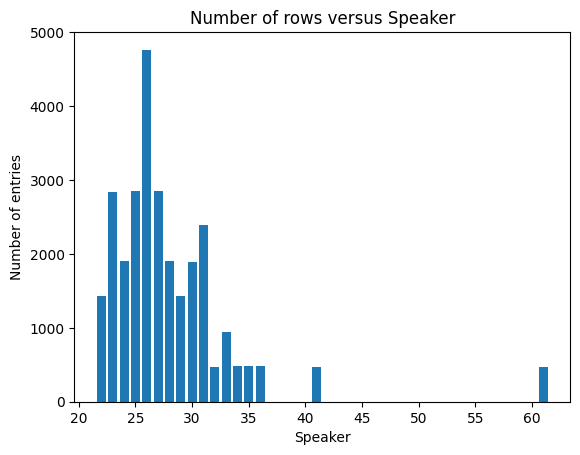

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_label(y, title, x_title, y_title='Number of entries'):
  unique_classes, class_counts = np.unique(y, return_counts=True)
  plt.bar(unique_classes, class_counts)
  plt.xlabel(x_title)
  plt.ylabel(y_title)
  plt.title(title)
  plt.show()

visualize_label(data['label_2'], "Number of rows versus Speaker","Speaker");

## Import Train Dataset

In [137]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/ML/speech-based-classification-layer-9/train.csv"
data = pd.read_csv(csv_url)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,45,NaN,1,6
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,45,NaN,1,6
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,45,NaN,1,6
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,45,NaN,1,6
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,45,NaN,1,6


In [129]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [138]:
print(f"data dataset shape {data.shape}")
print(f"# of missing values {data['label_2'].isna().sum()}")
print(f"# of labels {data['label_2'].value_counts().shape[0]}")
print(f"label summary\n{data['label_2'].value_counts()}")

data.dropna(subset=['label_2'], inplace=True)
print(f"data dataset shape {data.shape}")

data dataset shape (28520, 772)
# of missing values 480
# of labels 17
label summary
26.0    4762
25.0    2849
27.0    2846
23.0    2842
31.0    2385
24.0    1906
28.0    1899
30.0    1894
22.0    1432
29.0    1424
33.0     945
36.0     481
35.0     480
34.0     478
32.0     476
41.0     474
61.0     467
Name: label_2, dtype: int64
data dataset shape (28040, 772)


## Model

In [77]:
class AgeClassifier(nn.Module):
    def __init__(self, dropout_prob=0.5, weight_decay=1e-5):
        super(AgeClassifier, self).__init__()
        self.linear1 = nn.Linear(768, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 17)

        # Define dropout layers
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.dropout3 = nn.Dropout(p=dropout_prob)

        # Define L2 regularization (weight decay) for linear layers
        self.l2_regularization = nn.Linear(1, 1)  # Initialize a linear layer with weight 1

        # Set weight_decay for regularization
        self.weight_decay = weight_decay

    def forward(self, tensors):
        output_l1 = torch.relu(self.linear1(tensors))
        output_l2 = torch.relu(self.linear2(output_l1))
        output_l3 = torch.relu(self.linear3(output_l2))
        output_l4 = self.linear4(output_l3)
        return output_l4

    def l2_regularization_loss(self):
        # Calculate L2 regularization loss for linear layers
        l2_loss = 0.0
        for param in self.parameters():
            if param.requires_grad:
                l2_loss += torch.norm(param, 2)
        return self.weight_decay * l2_loss


In [139]:
from sklearn.preprocessing import OneHotEncoder

label_2 = data['label_2'].values.reshape(-1, 1)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(label_2)
print(ohe.categories_)

label_2 = ohe.transform(label_2)
print(label_2)

[array([22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34.,
       35., 36., 41., 61.])]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :768], label_2, test_size=0.2, stratify=label_2, random_state=2023)

X_train_tensors = torch.tensor(X_train.iloc[:, :].values, dtype=torch.float32)
print(X_train_tensors.shape)

X_test_tensors = torch.tensor(X_test.iloc[:, :].values, dtype=torch.float32)
print(X_test_tensors.shape)

torch.Size([22432, 768])
torch.Size([5608, 768])


In [83]:
# Create an instance of the FakeBERT model
ageClassifier = AgeClassifier()

# Define a cross-entropy loss function
criterion = nn.CrossEntropyLoss()

# Create a DataLoader for batching
batch_size = 128
dataset = TensorDataset(X_train_tensors, torch.tensor(y_train))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define an optimizer
optimizer = torch.optim.Adam(ageClassifier.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):

    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = ageClassifier(inputs)

        ce_loss = criterion(outputs, targets)
        l2_loss = ageClassifier.l2_regularization_loss()

        total_loss = ce_loss + l2_loss

        total_loss.backward()
        optimizer.step()

    y_test_pred = ageClassifier(X_test_tensors)
    ce = criterion(y_test_pred, torch.tensor(y_test))
    acc = (torch.argmax(y_test_pred, 1) == torch.argmax(torch.tensor(y_test), 1)).float().mean()
    print(f"Epoch {epoch} validation: Cross-entropy={float(ce)}, Accuracy={float(acc)}")

# Save the trained model if needed
# torch.save(ageClassifier.state_dict(), 'ageClassifier_model.pth')

Epoch 0 validation: Cross-entropy=1.7034866404779436, Accuracy=0.4177960157394409
Epoch 1 validation: Cross-entropy=1.1445258771877986, Accuracy=0.6112695932388306
Epoch 2 validation: Cross-entropy=0.7358213416191419, Accuracy=0.7606989741325378
Epoch 3 validation: Cross-entropy=0.5778941976712242, Accuracy=0.8097360730171204
Epoch 4 validation: Cross-entropy=0.5379551281052848, Accuracy=0.8195434808731079
Epoch 5 validation: Cross-entropy=0.43613240913258144, Accuracy=0.8537803292274475
Epoch 6 validation: Cross-entropy=0.431804007059977, Accuracy=0.8630527853965759
Epoch 7 validation: Cross-entropy=0.34695797932899103, Accuracy=0.8874821662902832
Epoch 8 validation: Cross-entropy=0.3405121017712222, Accuracy=0.8917617797851562
Epoch 9 validation: Cross-entropy=0.3375643900110886, Accuracy=0.8930099606513977
Epoch 10 validation: Cross-entropy=0.30990646097180585, Accuracy=0.901925802230835
Epoch 11 validation: Cross-entropy=0.3593642776567063, Accuracy=0.8928316831588745
Epoch 12 vali

## Import Test Dataset

In [84]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/ML/speech-based-classification-layer-9/valid.csv"
data = pd.read_csv(csv_url)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,-0.130454,0.103857,0.130866,-0.036366,-0.152212,-0.072316,-0.041838,-0.019596,0.038727,0.022496,...,0.129246,0.018913,0.013387,-0.054259,0.006282,0.049646,45,NaN,1,6
1,0.019179,0.104888,0.079487,0.005187,-0.134111,-0.109271,0.054558,-0.083966,-0.000091,0.083015,...,-0.031823,0.061069,0.036411,0.101357,0.088504,0.008192,45,NaN,1,6
2,-0.028485,0.051889,0.033343,-0.029115,-0.091265,-0.038653,0.113460,-0.057983,0.128808,0.062455,...,-0.033106,-0.007366,-0.027673,0.052090,0.044097,0.054422,45,NaN,1,6
3,-0.078959,0.082325,0.068852,-0.028885,-0.146059,-0.071453,-0.028955,0.031253,0.034923,0.019338,...,0.164456,-0.025891,0.037993,0.012060,-0.044266,0.045405,45,NaN,1,6
4,0.001748,0.050968,-0.034524,0.074153,0.063857,-0.133338,0.102604,-0.031676,0.010629,-0.018684,...,-0.102749,0.022433,0.018421,0.086064,0.075351,-0.067089,45,NaN,1,6


In [90]:
print(f"data dataset shape {data.shape}")
print(f"# of missing values {data['label_2'].isna().sum()}")
print(f"# of labels {data['label_2'].value_counts().shape[0]}")
print(f"label summary\n{data['label_2'].value_counts()}")

data.dropna(subset=['label_2'], inplace=True)
print(f"data dataset shape {data.shape}")

data dataset shape (750, 772)
# of missing values 14
# of labels 17
label summary
26.0    115
27.0     81
25.0     79
23.0     71
31.0     65
30.0     48
28.0     46
24.0     46
29.0     45
22.0     36
33.0     30
61.0     19
41.0     14
34.0     11
32.0     11
35.0     11
36.0      8
Name: label_2, dtype: int64
data dataset shape (736, 772)


In [91]:
from sklearn.preprocessing import OneHotEncoder

label_2 = data['label_2'].values.reshape(-1, 1)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(label_2)
print(ohe.categories_)

label_2 = ohe.transform(label_2)
print(label_2)

[array([22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34.,
       35., 36., 41., 61.])]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [92]:
# Set your model to evaluation mode
ageClassifier.eval()

X_test_tensors = torch.tensor(data.iloc[:, :768].values, dtype=torch.float32)
print(X_test_tensors.shape)

y_pred = ageClassifier(X_test_tensors)
ce = criterion(y_pred, torch.tensor(label_2))
acc = (torch.argmax(y_pred, 1) == torch.argmax(torch.tensor(label_2), 1)).float().mean()
print(f"Cross-entropy={float(ce)}, Test Accuracy={float(acc)}")

torch.Size([736, 768])
Cross-entropy=0.49400021843906605, Test Accuracy=0.9239130616188049


## Evaluate the Model

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_labels = torch.argmax(y_pred, axis=1).numpy()
label_2_np = torch.argmax(torch.tensor(label_2), axis=1).numpy()

confusion = confusion_matrix(label_2_np, y_pred_labels)
print(classification_report(label_2_np, y_pred_labels))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        36
           1       0.86      0.89      0.88        71
           2       0.88      0.96      0.92        46
           3       0.97      0.85      0.91        79
           4       0.89      0.94      0.91       115
           5       0.99      0.95      0.97        81
           6       0.93      0.91      0.92        46
           7       0.90      0.96      0.92        45
           8       0.88      0.96      0.92        48
           9       0.95      0.95      0.95        65
          10       1.00      0.91      0.95        11
          11       0.97      0.97      0.97        30
          12       1.00      1.00      1.00        11
          13       1.00      0.91      0.95        11
          14       0.89      1.00      0.94         8
          15       1.00      0.71      0.83        14
          16       0.89      0.89      0.89        19

    accuracy              

## Use PCA to Reduce Feature Space

In [141]:
def pca_reduce(X,pca, first_fit=False):
  feature_names = X.columns
  if first_fit:
    X_train_pca = pca.fit_transform(X)
  else:
    X_train_pca = pca.transform(X)
  return pd.DataFrame(data=X_train_pca, columns=[X.columns[i] for i in range(X_train_pca.shape[1])])

In [142]:
from sklearn.decomposition import PCA

desired_variance_ratio = 0.95
pca = PCA(n_components=desired_variance_ratio, svd_solver='full')
X_train_after_reduction = pca_reduce(data.iloc[:, :768], pca, first_fit=True)

In [143]:
print(data.iloc[:, :768].shape)
print(X_train_after_reduction.shape)

(28040, 768)
(28040, 215)


In [148]:
class AgeClassifierReduced(nn.Module):
    def __init__(self, dropout_prob=0.5, weight_decay=1e-5):
        super(AgeClassifierReduced, self).__init__()
        self.linear1 = nn.Linear(215, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 17)

        # Define dropout layers
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.dropout3 = nn.Dropout(p=dropout_prob)

        # Define L2 regularization (weight decay) for linear layers
        self.l2_regularization = nn.Linear(1, 1)  # Initialize a linear layer with weight 1

        # Set weight_decay for regularization
        self.weight_decay = weight_decay

    def forward(self, tensors):
        output_l1 = torch.relu(self.linear1(tensors))
        output_l2 = torch.relu(self.linear2(output_l1))
        output_l3 = torch.relu(self.linear3(output_l2))
        output_l4 = self.linear4(output_l3)
        return output_l4

    def l2_regularization_loss(self):
        # Calculate L2 regularization loss for linear layers
        l2_loss = 0.0
        for param in self.parameters():
            if param.requires_grad:
                l2_loss += torch.norm(param, 2)
        return self.weight_decay * l2_loss

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_after_reduction, label_2, test_size=0.2, stratify=label_2, random_state=2023)


X_train_tensors = torch.tensor(X_train.iloc[:, :].values, dtype=torch.float32)
print(X_train_tensors.shape)

X_test_tensors = torch.tensor(X_test.iloc[:, :].values, dtype=torch.float32)
print(X_test_tensors.shape)

torch.Size([22432, 215])
torch.Size([5608, 215])


In [149]:
# Create an instance of the FakeBERT model
ageClassifierReduced = AgeClassifierReduced()

# Define a cross-entropy loss function
criterion = nn.CrossEntropyLoss()

# Create a DataLoader for batching
batch_size = 128
dataset = TensorDataset(X_train_tensors, torch.tensor(y_train))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define an optimizer
optimizer = torch.optim.Adam(ageClassifierReduced.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):

    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = ageClassifierReduced(inputs)

        ce_loss = criterion(outputs, targets)
        l2_loss = ageClassifierReduced.l2_regularization_loss()

        total_loss = ce_loss + l2_loss

        total_loss.backward()
        optimizer.step()

    y_test_pred = ageClassifierReduced(X_test_tensors)
    ce = criterion(y_test_pred, torch.tensor(y_test))
    acc = (torch.argmax(y_test_pred, 1) == torch.argmax(torch.tensor(y_test), 1)).float().mean()
    print(f"Epoch {epoch} validation: Cross-entropy={float(ce)}, Accuracy={float(acc)}")



Epoch 0 validation: Cross-entropy=1.2716102126821212, Accuracy=0.5805991291999817
Epoch 1 validation: Cross-entropy=0.597358945821778, Accuracy=0.8182953000068665
Epoch 2 validation: Cross-entropy=0.42276942801391293, Accuracy=0.863766074180603
Epoch 3 validation: Cross-entropy=0.3489250262522466, Accuracy=0.8873038291931152
Epoch 4 validation: Cross-entropy=0.29914088822933943, Accuracy=0.9095934629440308
Epoch 5 validation: Cross-entropy=0.2930264654512493, Accuracy=0.9078102707862854
Epoch 6 validation: Cross-entropy=0.2840065135578436, Accuracy=0.9151212573051453
Epoch 7 validation: Cross-entropy=0.2914657073140093, Accuracy=0.9126248359680176
Epoch 8 validation: Cross-entropy=0.3032713569703812, Accuracy=0.9152995944023132
Epoch 9 validation: Cross-entropy=0.29280746159612425, Accuracy=0.921718955039978
Epoch 10 validation: Cross-entropy=0.2989621124642201, Accuracy=0.9188659191131592
Epoch 11 validation: Cross-entropy=0.3306678349232038, Accuracy=0.9181526303291321
Epoch 12 valid

# For Label 3

## Data Visualization

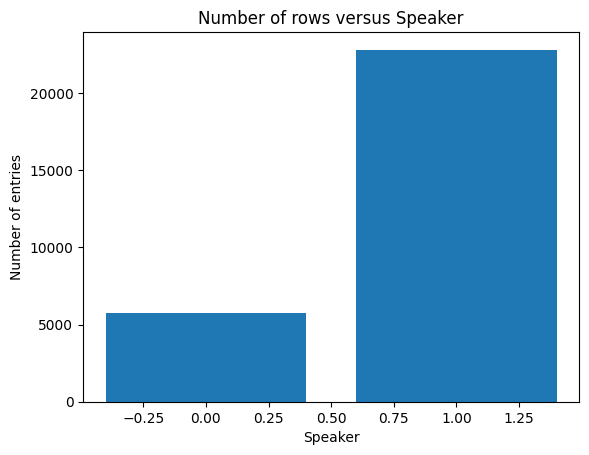

In [114]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/ML/speech-based-classification-layer-9/train.csv"
data = pd.read_csv(csv_url)
data.head()

import matplotlib.pyplot as plt
import numpy as np

def visualize_label(y, title, x_title, y_title='Number of entries'):
  unique_classes, class_counts = np.unique(y, return_counts=True)
  plt.bar(unique_classes, class_counts)
  plt.xlabel(x_title)
  plt.ylabel(y_title)
  plt.title(title)
  plt.show()

visualize_label(data['label_3'], "Number of rows versus Speaker","Speaker")

## Import Train Dataset

In [115]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/ML/speech-based-classification-layer-9/train.csv"
data = pd.read_csv(csv_url)
data.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,45,NaN,1,6
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,45,NaN,1,6
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,45,NaN,1,6
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,45,NaN,1,6
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,45,NaN,1,6


In [116]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [118]:
print(f"data dataset shape {data.shape}")
print(f"# of missing values {data['label_3'].isna().sum()}")
print(f"# of labels {data['label_3'].value_counts().shape[0]}")
print(f"label summary\n{data['label_3'].value_counts()}")

data dataset shape (28520, 772)
# of missing values 0
# of labels 2
label summary
1    22796
0     5724
Name: label_3, dtype: int64


## Model

In [122]:
class GenderClassifier(nn.Module):
    def __init__(self, dropout_prob=0.5, weight_decay=1e-5):
        super(GenderClassifier, self).__init__()
        self.linear1 = nn.Linear(768, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 2)

        # Define dropout layers
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.dropout3 = nn.Dropout(p=dropout_prob)

        # Define L2 regularization (weight decay) for linear layers
        self.l2_regularization = nn.Linear(1, 1)  # Initialize a linear layer with weight 1

        # Set weight_decay for regularization
        self.weight_decay = weight_decay

    def forward(self, tensors):
        output_l1 = torch.relu(self.linear1(tensors))
        output_l2 = torch.relu(self.linear2(output_l1))
        output_l3 = torch.relu(self.linear3(output_l2))
        output_l4 = self.linear4(output_l3)
        return output_l4

    def l2_regularization_loss(self):
        # Calculate L2 regularization loss for linear layers
        l2_loss = 0.0
        for param in self.parameters():
            if param.requires_grad:
                l2_loss += torch.norm(param, 2)
        return self.weight_decay * l2_loss

In [120]:
from sklearn.preprocessing import OneHotEncoder

label_3 = data['label_3'].values.reshape(-1, 1)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(label_3)
print(ohe.categories_)

label_3 = ohe.transform(label_3)
print(label_3)

[array([0, 1])]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :768], label_3, test_size=0.2, stratify=label_3, random_state=2023)


X_train_tensors = torch.tensor(X_train.iloc[:, :].values, dtype=torch.float32)
print(X_train_tensors.shape)


X_test_tensors = torch.tensor(X_test.iloc[:, :].values, dtype=torch.float32)
print(X_test_tensors.shape)

torch.Size([22816, 768])
torch.Size([5704, 768])


In [124]:
# Create an instance of the FakeBERT model
genderClassifier = GenderClassifier()

# Define a cross-entropy loss function
criterion = nn.CrossEntropyLoss()

# Create a DataLoader for batching
batch_size = 128
dataset = TensorDataset(X_train_tensors, torch.tensor(y_train))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define an optimizer
optimizer = torch.optim.Adam(genderClassifier.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):

    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = genderClassifier(inputs)

        ce_loss = criterion(outputs, targets)
        l2_loss = genderClassifier.l2_regularization_loss()

        total_loss = ce_loss + l2_loss

        total_loss.backward()
        optimizer.step()

    y_test_pred = genderClassifier(X_test_tensors)
    ce = criterion(y_test_pred, torch.tensor(y_test))
    acc = (torch.argmax(y_test_pred, 1) == torch.argmax(torch.tensor(y_test), 1)).float().mean()
    print(f"Epoch {epoch} validation: Cross-entropy={float(ce)}, Accuracy={float(acc)}")

# Save the trained model if needed
# torch.save(genderClassifier.state_dict(), 'genderClassifier_model.pth')


Epoch 0 validation: Cross-entropy=0.027045032565743286, Accuracy=0.9907082915306091
Epoch 1 validation: Cross-entropy=0.028986611251710044, Accuracy=0.9880785346031189
Epoch 2 validation: Cross-entropy=0.019753493172005015, Accuracy=0.9931626915931702
Epoch 3 validation: Cross-entropy=0.019525034576076274, Accuracy=0.9940392971038818
Epoch 4 validation: Cross-entropy=0.01880676130506908, Accuracy=0.9938639402389526
Epoch 5 validation: Cross-entropy=0.03193842812704491, Accuracy=0.9921107888221741
Epoch 6 validation: Cross-entropy=0.015536973819121282, Accuracy=0.9945651888847351
Epoch 7 validation: Cross-entropy=0.02243939872249097, Accuracy=0.9914095401763916
Epoch 8 validation: Cross-entropy=0.018849490266476147, Accuracy=0.9938639402389526
Epoch 9 validation: Cross-entropy=0.016520795772432848, Accuracy=0.9952664971351624


## Import Test Dataset

In [162]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/ML/speech-based-classification-layer-9/valid.csv"
data = pd.read_csv(csv_url)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,-0.130454,0.103857,0.130866,-0.036366,-0.152212,-0.072316,-0.041838,-0.019596,0.038727,0.022496,...,0.129246,0.018913,0.013387,-0.054259,0.006282,0.049646,45,NaN,1,6
1,0.019179,0.104888,0.079487,0.005187,-0.134111,-0.109271,0.054558,-0.083966,-0.000091,0.083015,...,-0.031823,0.061069,0.036411,0.101357,0.088504,0.008192,45,NaN,1,6
2,-0.028485,0.051889,0.033343,-0.029115,-0.091265,-0.038653,0.113460,-0.057983,0.128808,0.062455,...,-0.033106,-0.007366,-0.027673,0.052090,0.044097,0.054422,45,NaN,1,6
3,-0.078959,0.082325,0.068852,-0.028885,-0.146059,-0.071453,-0.028955,0.031253,0.034923,0.019338,...,0.164456,-0.025891,0.037993,0.012060,-0.044266,0.045405,45,NaN,1,6
4,0.001748,0.050968,-0.034524,0.074153,0.063857,-0.133338,0.102604,-0.031676,0.010629,-0.018684,...,-0.102749,0.022433,0.018421,0.086064,0.075351,-0.067089,45,NaN,1,6


In [163]:
print(f"data dataset shape {data.shape}")
print(f"# of missing values {data['label_3'].isna().sum()}")
print(f"# of labels {data['label_3'].value_counts().shape[0]}")
print(f"label summary\n{data['label_3'].value_counts()}")

data.dropna(subset=['label_3'], inplace=True)
print(f"data dataset shape {data.shape}")

data dataset shape (750, 772)
# of missing values 0
# of labels 2
label summary
1    608
0    142
Name: label_3, dtype: int64
data dataset shape (750, 772)


In [164]:
from sklearn.preprocessing import OneHotEncoder

label_3 = data['label_3'].values.reshape(-1, 1)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(label_3)
print(ohe.categories_)

label_3 = ohe.transform(label_3)
print(label_3)


[array([0, 1])]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [165]:
# Set your model to evaluation mode
genderClassifier.eval()

X_test_tensors = torch.tensor(data.iloc[:, :768].values, dtype=torch.float32)
print(X_test_tensors.shape)

y_pred = genderClassifier(X_test_tensors)
ce = criterion(y_pred, torch.tensor(label_3))
acc = (torch.argmax(y_pred, 1) == torch.argmax(torch.tensor(label_3), 1)).float().mean()
print(f"Cross-entropy={float(ce)}, Test Accuracy={float(acc)}")


torch.Size([750, 768])
Cross-entropy=0.02076572517304038, Test Accuracy=0.9959999918937683


## Evaluation of the Model

In [166]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_labels = torch.argmax(y_pred, axis=1).numpy()
label_3_np = torch.argmax(torch.tensor(label_3), axis=1).numpy()

confusion = confusion_matrix(label_3_np, y_pred_labels)
print(classification_report(label_3_np, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       1.00      1.00      1.00       608

    accuracy                           1.00       750
   macro avg       0.99      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



## Use PCA to Reduce Feature Space

# For Label 4

## Data Visualization

In [155]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/ML/speech-based-classification-layer-9/train.csv"
data = pd.read_csv(csv_url)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,45,NaN,1,6
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,45,NaN,1,6
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,45,NaN,1,6
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,45,NaN,1,6
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,45,NaN,1,6


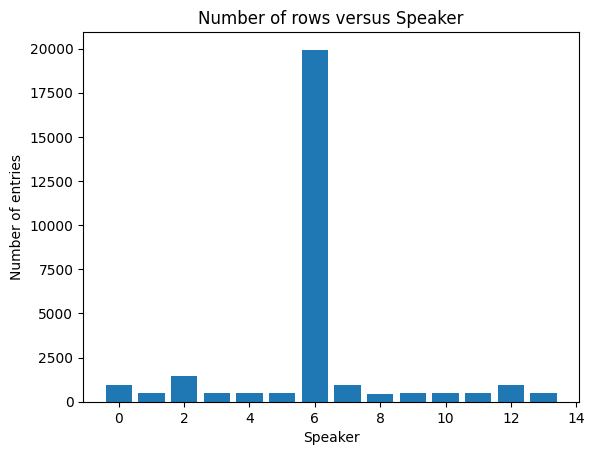

In [161]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_label(y, title, x_title, y_title='Number of entries'):
  unique_classes, class_counts = np.unique(y, return_counts=True)
  plt.bar(unique_classes, class_counts)
  plt.xlabel(x_title)
  plt.ylabel(y_title)
  plt.title(title)
  plt.show()

visualize_label(data['label_4'], "Number of rows versus Speaker","Speaker")

## Import Train Dataset

In [167]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/ML/speech-based-classification-layer-9/train.csv"
data = pd.read_csv(csv_url)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,45,NaN,1,6
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,45,NaN,1,6
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,45,NaN,1,6
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,45,NaN,1,6
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,45,NaN,1,6


In [168]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [171]:
print(f"data dataset shape {data.shape}")
print(f"# of missing values {data['label_4'].isna().sum()}")
print(f"# of labels {data['label_4'].value_counts().shape[0]}")
print(f"label summary\n{data['label_4'].value_counts()}")


data dataset shape (28520, 772)
# of missing values 0
# of labels 14
label summary
6     19938
2      1449
0       955
12      954
7       938
13      482
1       481
11      480
10      480
3       479
5       478
9       472
4       469
8       465
Name: label_4, dtype: int64


## Model

In [172]:
class AccentClassifier(nn.Module):
    def __init__(self, dropout_prob=0.5, weight_decay=1e-5):
        super(AccentClassifier, self).__init__()
        self.linear1 = nn.Linear(768, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 14)

        # Define dropout layers
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.dropout3 = nn.Dropout(p=dropout_prob)

        # Define L2 regularization (weight decay) for linear layers
        self.l2_regularization = nn.Linear(1, 1)  # Initialize a linear layer with weight 1

        # Set weight_decay for regularization
        self.weight_decay = weight_decay

    def forward(self, tensors):
        output_l1 = torch.relu(self.linear1(tensors))
        output_l2 = torch.relu(self.linear2(output_l1))
        output_l3 = torch.relu(self.linear3(output_l2))
        output_l4 = self.linear4(output_l3)
        return output_l4

    def l2_regularization_loss(self):
        # Calculate L2 regularization loss for linear layers
        l2_loss = 0.0
        for param in self.parameters():
            if param.requires_grad:
                l2_loss += torch.norm(param, 2)
        return self.weight_decay * l2_loss

In [173]:
from sklearn.preprocessing import OneHotEncoder

label_4 = data['label_4'].values.reshape(-1, 1)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(label_4)
print(ohe.categories_)

label_4 = ohe.transform(label_4)
print(label_4)


[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :768], label_4, test_size=0.2, stratify=label_4, random_state=2023)

X_train_tensors = torch.tensor(X_train.iloc[:, :].values, dtype=torch.float32)
print(X_train_tensors.shape)

X_test_tensors = torch.tensor(X_test.iloc[:, :].values, dtype=torch.float32)
print(X_test_tensors.shape)

torch.Size([22816, 768])
torch.Size([5704, 768])


In [176]:
# Create an instance of the FakeBERT model
accentClassifier = AccentClassifier()

# Define a cross-entropy loss function
criterion = nn.CrossEntropyLoss()

# Create a DataLoader for batching
batch_size = 128
dataset = TensorDataset(X_train_tensors, torch.tensor(y_train))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define an optimizer
optimizer = torch.optim.Adam(accentClassifier.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):

    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = accentClassifier(inputs)

        ce_loss = criterion(outputs, targets)
        l2_loss = accentClassifier.l2_regularization_loss()

        total_loss = ce_loss + l2_loss

        total_loss.backward()
        optimizer.step()

    y_test_pred = accentClassifier(X_test_tensors)
    ce = criterion(y_test_pred, torch.tensor(y_test))
    acc = (torch.argmax(y_test_pred, 1) == torch.argmax(torch.tensor(y_test), 1)).float().mean()
    print(f"Epoch {epoch} validation: Cross-entropy={float(ce)}, Accuracy={float(acc)}")


Epoch 0 validation: Cross-entropy=1.1380791470827158, Accuracy=0.6991584897041321
Epoch 1 validation: Cross-entropy=0.6240984751553268, Accuracy=0.8094319701194763
Epoch 2 validation: Cross-entropy=0.3848370156770918, Accuracy=0.8869214653968811
Epoch 3 validation: Cross-entropy=0.31684405409313326, Accuracy=0.9037517309188843
Epoch 4 validation: Cross-entropy=0.24547289156737417, Accuracy=0.9274193644523621
Epoch 5 validation: Cross-entropy=0.22594310002635584, Accuracy=0.9347826242446899
Epoch 6 validation: Cross-entropy=0.20300095173983243, Accuracy=0.9444249868392944
Epoch 7 validation: Cross-entropy=0.20732985072644136, Accuracy=0.9444249868392944
Epoch 8 validation: Cross-entropy=0.1900395283484707, Accuracy=0.9442496299743652
Epoch 9 validation: Cross-entropy=0.18063496672540155, Accuracy=0.9514375925064087
Epoch 10 validation: Cross-entropy=0.21917805792643885, Accuracy=0.9424964785575867
Epoch 11 validation: Cross-entropy=0.19266490135708716, Accuracy=0.9482818841934204
Epoch 

In [178]:
# Save the trained model if needed
torch.save(accentClassifier.state_dict(), 'accentClassifier_model.pth')

## Import Test Dataset

In [177]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/ML/speech-based-classification-layer-9/valid.csv"
data = pd.read_csv(csv_url)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,-0.130454,0.103857,0.130866,-0.036366,-0.152212,-0.072316,-0.041838,-0.019596,0.038727,0.022496,...,0.129246,0.018913,0.013387,-0.054259,0.006282,0.049646,45,NaN,1,6
1,0.019179,0.104888,0.079487,0.005187,-0.134111,-0.109271,0.054558,-0.083966,-0.000091,0.083015,...,-0.031823,0.061069,0.036411,0.101357,0.088504,0.008192,45,NaN,1,6
2,-0.028485,0.051889,0.033343,-0.029115,-0.091265,-0.038653,0.113460,-0.057983,0.128808,0.062455,...,-0.033106,-0.007366,-0.027673,0.052090,0.044097,0.054422,45,NaN,1,6
3,-0.078959,0.082325,0.068852,-0.028885,-0.146059,-0.071453,-0.028955,0.031253,0.034923,0.019338,...,0.164456,-0.025891,0.037993,0.012060,-0.044266,0.045405,45,NaN,1,6
4,0.001748,0.050968,-0.034524,0.074153,0.063857,-0.133338,0.102604,-0.031676,0.010629,-0.018684,...,-0.102749,0.022433,0.018421,0.086064,0.075351,-0.067089,45,NaN,1,6


In [179]:
from sklearn.preprocessing import OneHotEncoder

label_4 = data['label_4'].values.reshape(-1, 1)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(label_4)
print(ohe.categories_)

label_4 = ohe.transform(label_4)
print(label_4)

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [180]:
# Set your model to evaluation mode
accentClassifier.eval()

X_test_tensors = torch.tensor(data.iloc[:, :768].values, dtype=torch.float32)
print(X_test_tensors.shape)

y_pred = accentClassifier(X_test_tensors)
ce = criterion(y_pred, torch.tensor(label_4))
acc = (torch.argmax(y_pred, 1) == torch.argmax(torch.tensor(label_4), 1)).float().mean()
print(f"Cross-entropy={float(ce)}, Test Accuracy={float(acc)}")


torch.Size([750, 768])
Cross-entropy=0.1509767981103822, Test Accuracy=0.972000002861023


## Evaluation of the Model

In [181]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_labels = torch.argmax(y_pred, axis=1).numpy()
label_4_np = torch.argmax(torch.tensor(label_4), axis=1).numpy()

confusion = confusion_matrix(label_4_np, y_pred_labels)
print(classification_report(label_4_np, y_pred_labels))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      1.00      1.00        11
           2       0.96      0.93      0.94        27
           3       1.00      1.00      1.00         8
           4       0.86      0.80      0.83        15
           5       0.85      1.00      0.92        11
           6       0.98      0.99      0.98       532
           7       0.94      0.94      0.94        32
           8       1.00      0.95      0.97        19
           9       1.00      0.82      0.90        17
          10       1.00      1.00      1.00        10
          11       0.91      0.91      0.91        11
          12       1.00      0.92      0.96        26
          13       0.91      1.00      0.95        10

    accuracy                           0.97       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.97      0.97      0.97       750



# Feature Engineering

In [1]:
import pandas as pd

csv_url = "/content/drive/MyDrive/#Semester07/ML/speech-based-classification-layer-9/train.csv"
data = pd.read_csv(csv_url)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,45,NaN,1,6
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,45,NaN,1,6
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,45,NaN,1,6
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,45,NaN,1,6
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,45,NaN,1,6


In [2]:
data_features = data.iloc[:, :768]

## How To Drop Constant Features Using Variance Threshold

In [3]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold

var_thres=VarianceThreshold(threshold=0.0018)
var_thres.fit(data_features)

VarianceThreshold(threshold=0.0018)

In [24]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [18]:
data_features.columns[var_thres.get_support()]

Index(['feature_17', 'feature_23', 'feature_25', 'feature_27', 'feature_32',
       'feature_36', 'feature_42', 'feature_45', 'feature_53', 'feature_57',
       ...
       'feature_724', 'feature_725', 'feature_733', 'feature_740',
       'feature_748', 'feature_749', 'feature_762', 'feature_763',
       'feature_766', 'feature_767'],
      dtype='object', length=184)

In [4]:
constant_columns = [column for column in data_features.columns
                    if column not in data_features.columns[var_thres.get_support()]]

print(len(constant_columns))

3


In [5]:
for feature in constant_columns:
     print(feature)

feature_51
feature_552
feature_569


In [6]:
new_features = data_features.drop(constant_columns,axis=1)

In [7]:
print(data_features.shape)
print(new_features.shape)

(28520, 768)
(28520, 765)


## How To Drop Features Using Pearson Correlation

In [29]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data_features.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
feature_1,1.000000,0.065348,-0.039416,0.116528,0.108225,-0.163679,0.131004,-0.073198,-0.045476,-0.120560,...,-0.225724,0.290177,0.015310,0.144664,-0.110313,-0.040330,0.132620,0.032706,0.035296,-0.039317
feature_2,0.065348,1.000000,0.043611,0.068624,-0.278709,0.052155,-0.267946,-0.214403,-0.235840,-0.056829,...,-0.150852,-0.096604,0.287950,-0.099087,0.269144,0.005612,-0.068710,-0.204834,-0.350866,0.162593
feature_3,-0.039416,0.043611,1.000000,-0.185437,-0.313107,-0.103496,-0.214606,-0.185952,0.155197,0.011407,...,-0.248988,-0.162378,-0.024814,0.162806,0.231606,0.204807,0.133835,-0.063354,0.159975,0.217143
feature_4,0.116528,0.068624,-0.185437,1.000000,0.096349,-0.220416,0.194002,0.027816,-0.144393,-0.148927,...,0.135598,0.071113,-0.084978,-0.166751,-0.220446,0.103712,0.100221,0.006758,0.034292,-0.128138
feature_5,0.108225,-0.278709,-0.313107,0.096349,1.000000,0.021056,0.325761,-0.000900,0.038333,-0.116997,...,-0.020572,0.024932,-0.202849,0.031865,-0.371326,-0.087327,-0.063512,0.016875,-0.031415,-0.203071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_764,-0.040330,0.005612,0.204807,0.103712,-0.087327,-0.174192,0.122454,0.012446,0.199985,0.171440,...,0.075743,0.065512,-0.313912,-0.196618,-0.114188,1.000000,0.208730,0.181622,0.405485,-0.009266
feature_765,0.132620,-0.068710,0.133835,0.100221,-0.063512,-0.345465,-0.002038,0.005804,0.053829,-0.116723,...,-0.103060,0.180543,-0.010908,-0.076788,0.228983,0.208730,1.000000,-0.204636,0.278358,-0.172730
feature_766,0.032706,-0.204834,-0.063354,0.006758,0.016875,-0.233690,0.282928,-0.105139,0.097498,0.391228,...,0.096985,0.293527,-0.266795,0.168379,-0.486373,0.181622,-0.204636,1.000000,0.388446,-0.065182
feature_767,0.035296,-0.350866,0.159975,0.034292,-0.031415,-0.350340,0.185927,0.045446,0.113304,0.265687,...,0.115303,0.274362,-0.343106,0.081103,-0.327079,0.405485,0.278358,0.388446,1.000000,-0.132940


In [33]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data_features.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [47]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    correlated_pairs = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                rowname = corr_matrix.index[j]  # getting the name of row
                correlated_pairs.add((rowname, colname))
    return correlated_pairs

In [49]:
corr_feature_pairs = correlation(data_features, 0.7)
len(set(corr_feature_pairs))

14

In [50]:
corr_feature_pairs

{('feature_210', 'feature_272'),
 ('feature_210', 'feature_366'),
 ('feature_210', 'feature_394'),
 ('feature_210', 'feature_396'),
 ('feature_210', 'feature_609'),
 ('feature_272', 'feature_366'),
 ('feature_272', 'feature_396'),
 ('feature_272', 'feature_548'),
 ('feature_272', 'feature_609'),
 ('feature_32', 'feature_647'),
 ('feature_366', 'feature_609'),
 ('feature_394', 'feature_609'),
 ('feature_396', 'feature_548'),
 ('feature_647', 'feature_763')}

In [51]:
def get_less_correlated_features(correlated_pairs, dataset, target_column):
    less_correlated_features = {}

    for (feature1, feature2) in correlated_pairs:
        corr1 = dataset[feature1].corr(dataset[target_column])
        corr2 = dataset[feature2].corr(dataset[target_column])

        if abs(corr1) < abs(corr2):
            correlated_pair = frozenset((feature1, feature2))  # Use a frozenset as the key
            less_correlated_features[correlated_pair] = feature1
        else:
            correlated_pair = frozenset((feature1, feature2))  # Use a frozenset as the key
            less_correlated_features[correlated_pair] = feature2

    return less_correlated_features

In [52]:
less_correlated_features = get_less_correlated_features(corr_feature_pairs, data, "label_1")

In [53]:
less_correlated_features

{frozenset({'feature_396', 'feature_548'}): 'feature_396',
 frozenset({'feature_210', 'feature_609'}): 'feature_210',
 frozenset({'feature_210', 'feature_272'}): 'feature_210',
 frozenset({'feature_272', 'feature_366'}): 'feature_366',
 frozenset({'feature_647', 'feature_763'}): 'feature_647',
 frozenset({'feature_272', 'feature_609'}): 'feature_609',
 frozenset({'feature_272', 'feature_548'}): 'feature_272',
 frozenset({'feature_394', 'feature_609'}): 'feature_394',
 frozenset({'feature_210', 'feature_394'}): 'feature_394',
 frozenset({'feature_210', 'feature_396'}): 'feature_210',
 frozenset({'feature_366', 'feature_609'}): 'feature_366',
 frozenset({'feature_32', 'feature_647'}): 'feature_647',
 frozenset({'feature_210', 'feature_366'}): 'feature_366',
 frozenset({'feature_272', 'feature_396'}): 'feature_396'}

In [54]:
corr_features = set(less_correlated_features.values())

In [55]:
corr_features

{'feature_210',
 'feature_272',
 'feature_366',
 'feature_394',
 'feature_396',
 'feature_609',
 'feature_647'}

In [77]:
new_features = data_features.drop(corr_features,axis=1)

In [78]:
print(data_features.shape)
print(new_features.shape)

(28520, 768)
(28520, 761)


## How To Select Features Using Information Gain For Classification In ML

In [58]:
from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(data_features, data["label_1"])
mutual_info

array([0.04824311, 0.04928069, 0.06907768, 0.04550545, 0.05018739,
       0.06166078, 0.04980773, 0.09553246, 0.05082624, 0.06600473,
       0.06060512, 0.06181716, 0.0929839 , 0.04289702, 0.07011671,
       0.05466382, 0.09769573, 0.06702534, 0.0609391 , 0.043556  ,
       0.06462512, 0.04084731, 0.16008013, 0.07018299, 0.10249195,
       0.05535044, 0.17229071, 0.06372255, 0.07171449, 0.07796989,
       0.10941006, 0.06595971, 0.07448658, 0.05514135, 0.04072556,
       0.0744859 , 0.0849005 , 0.07408929, 0.05847815, 0.05524293,
       0.05188349, 0.0840322 , 0.05128356, 0.055699  , 0.05061483,
       0.04532173, 0.09214998, 0.0511983 , 0.06668593, 0.08245423,
       0.05442044, 0.0893759 , 0.10403906, 0.0428782 , 0.06703081,
       0.06209468, 0.08819243, 0.09945341, 0.08530791, 0.04786223,
       0.06346363, 0.06875071, 0.05211944, 0.08739609, 0.0372984 ,
       0.05265958, 0.06526537, 0.06068409, 0.10574906, 0.07147358,
       0.07461322, 0.06891656, 0.0632586 , 0.05715053, 0.07465

In [60]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = data_features.columns
mutual_info.sort_values(ascending=False)

feature_242    0.300275
feature_582    0.246813
feature_545    0.209596
feature_302    0.198692
feature_204    0.197608
                 ...   
feature_422    0.035713
feature_215    0.035020
feature_138    0.034640
feature_634    0.034507
feature_596    0.033406
Length: 768, dtype: float64

<Axes: >

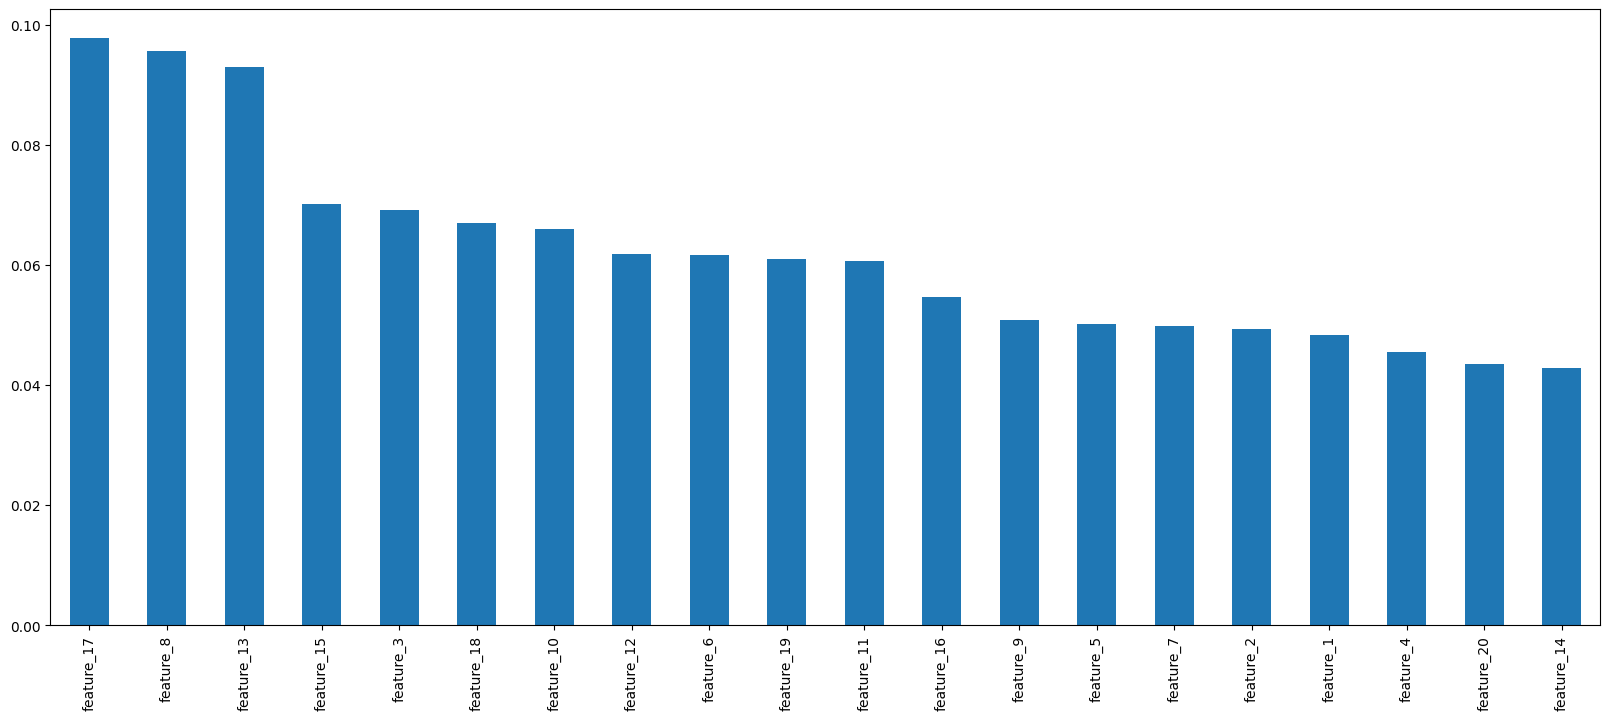

In [61]:
#let's plot the ordered mutual_info values per feature
mutual_info[:20].sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest

#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(data_features, data["label_1"])
data_features.columns[sel_five_cols.get_support()]

## Feature Selection Using Chi2 Statistical Analysis

# Outlier Detection and Removal

In [62]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

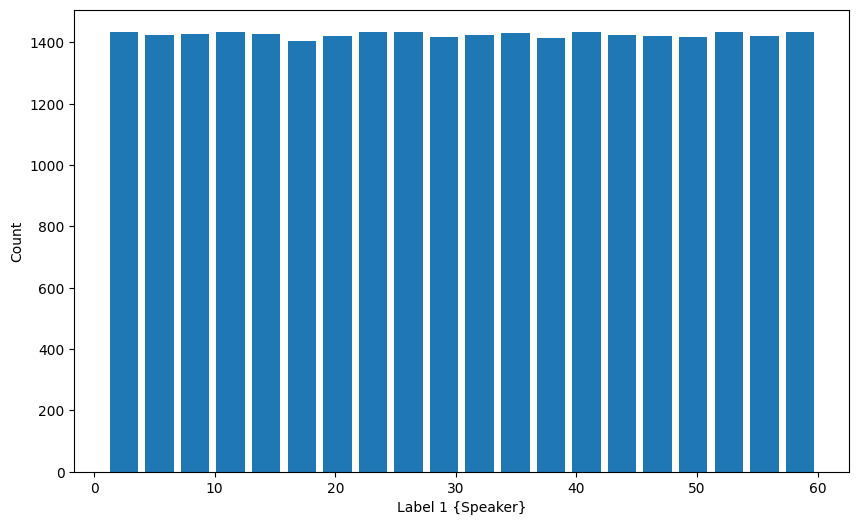

In [63]:
plt.hist(data["label_1"], bins=20, rwidth=0.8)
plt.xlabel('Label 1 {Speaker}')
plt.ylabel('Count')
plt.show()

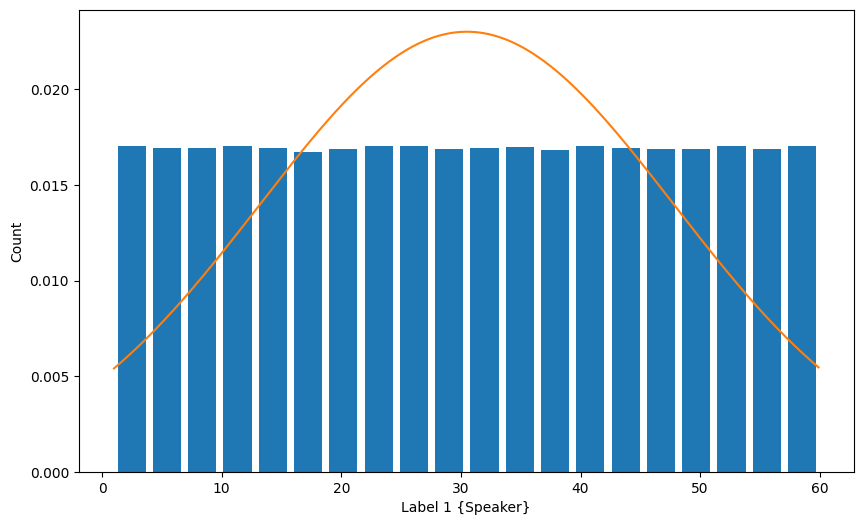

In [64]:
from scipy.stats import norm
import numpy as np
plt.hist(data["label_1"], bins=20, rwidth=0.8, density=True)
plt.xlabel('Label 1 {Speaker}')
plt.ylabel('Count')

rng = np.arange(data["label_1"].min(), data["label_1"].max(), 0.1)
plt.plot(rng, norm.pdf(rng,data["label_1"].mean(),data["label_1"].std()))

In [65]:
data["label_1"].mean()

30.498842917251054

In [66]:
data["label_1"].std()

17.328389416357716

## (1) Outlier detection and removal using 3 standard deviation

In [67]:
upper_limit = data["label_1"].mean() + 3*data["label_1"].std()
upper_limit

82.4840111663242

In [68]:
lower_limit = data["label_1"].mean() - 3*data["label_1"].std()
lower_limit

-21.486325331822094

In [69]:
## Here are the outliers that are beyond 3 std dev from mean

outliers = data[(data["label_1"]>upper_limit) | (data["label_1"]<lower_limit)]
outliers.shape

(0, 772)

## (2) Outlier detection and removal using Z Score

In [70]:
data['zscore'] = ( data["label_1"] - data["label_1"].mean() ) / data["label_1"].std()
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4,zscore
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,0.127319,0.098128,-0.058787,0.100971,-0.047754,45,NaN,1,6,0.836844
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.058968,0.029803,0.111324,0.036727,0.031927,45,NaN,1,6,0.836844
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,-0.040861,0.000548,-0.061003,-0.042450,0.063340,45,NaN,1,6,0.836844
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,-0.169225,-0.046391,0.148787,0.014616,-0.140644,45,NaN,1,6,0.836844
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,0.044907,0.084005,-0.038450,0.084371,-0.072146,45,NaN,1,6,0.836844


In [71]:
outliers = data[(data.zscore<-3) | (data.zscore>3)]

In [72]:
outliers.shape

(0, 773)

# Label 1 after feature selection

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [9]:
new_features.shape

(28520, 765)

In [20]:
class SpeakerClassifierAfter(nn.Module):
    def __init__(self, dropout_prob=0.5, weight_decay=1e-5):
        super(SpeakerClassifierAfter, self).__init__()
        self.linear0 = nn.Linear(768, 1024)
        self.linear1 = nn.Linear(1024, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 60)

        # Set weight_decay for regularization
        self.weight_decay = weight_decay

    def forward(self, tensors):
        output_l0 = torch.relu(self.linear0(tensors))
        output_l1 = torch.relu(self.linear1(output_l0))
        output_l2 = torch.relu(self.linear2(output_l1))
        output_l3 = torch.relu(self.linear3(output_l2))
        output_l4 = self.linear4(output_l3)
        return output_l4

    def l2_regularization_loss(self):
        # Calculate L2 regularization loss for linear layers
        l2_loss = 0.0
        for param in self.parameters():
            if param.requires_grad:
                l2_loss += torch.norm(param, 2)
        return self.weight_decay * l2_loss



In [11]:
from sklearn.preprocessing import OneHotEncoder

label_1 = data['label_1'].values.reshape(-1, 1)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(label_1)
print(ohe.categories_)

label_1 = ohe.transform(label_1)
print(label_1)

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :768], label_1, test_size=0.2, stratify=label_1, random_state=2023)

X_train_tensors = torch.tensor(X_train.iloc[:, :].values, dtype=torch.float32)
print(X_train_tensors.shape)


X_test_tensors = torch.tensor(X_test.iloc[:, :].values, dtype=torch.float32)
print(X_test_tensors.shape)

torch.Size([22816, 768])
torch.Size([5704, 768])


In [21]:
import numpy as np

# Create an instance of the FakeBERT model
speakerClassifierAfter = SpeakerClassifierAfter()

# Define a cross-entropy loss function
criterion = nn.CrossEntropyLoss()

# Create a DataLoader for batching
batch_size = 128
dataset = TensorDataset(X_train_tensors, torch.tensor(y_train))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define an optimizer
optimizer = torch.optim.Adam(speakerClassifierAfter.parameters(), lr=0.001)

# Define early stopping parameters
patience = 25  # Number of epochs with no improvement after which training will stop
best_validation_loss = np.inf  # Initialize with positive infinity
best_validation_accuracy = 0  # Initialize with positive infinity
no_improvement_counter = 0

# Training loop
epochs = 1000
for epoch in range(epochs):

    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = speakerClassifierAfter(inputs)

        ce_loss = criterion(outputs, targets)
        l2_loss = speakerClassifierAfter.l2_regularization_loss()

        total_loss = ce_loss + l2_loss

        total_loss.backward()
        optimizer.step()

    # Validation step (evaluate on validation dataset)
    with torch.no_grad():
        speakerClassifierAfter.eval()
        y_test_pred = speakerClassifierAfter(X_test_tensors)
        ce = criterion(y_test_pred, torch.tensor(y_test))
        acc = (torch.argmax(y_test_pred, 1) == torch.argmax(torch.tensor(y_test), 1)).float().mean()
        speakerClassifierAfter.train()

    print(f"Epoch {epoch} validation: Cross-entropy={float(ce)}, Accuracy={float(acc)}")

    # # Check for early stopping
    # if ce < best_validation_loss:
    #     best_validation_loss = ce
    #     no_improvement_counter = 0
    #     # Save the trained best model if needed
    #     torch.save(speakerClassifierAfter.state_dict(), 'speakerClassifierAfter_model.pth')
    # else:
    #     no_improvement_counter += 1

    # Check for early stopping
    if acc > best_validation_accuracy:
        best_validation_accuracy = acc
        no_improvement_counter = 0
        # Save the trained best model if needed
        torch.save(speakerClassifierAfter.state_dict(), 'speakerClassifierAfter_model.pth')
    else:
        no_improvement_counter += 1

    # If no improvement for 'patience' consecutive epochs, stop training
    if no_improvement_counter >= patience:
        print("Early stopping triggered. Training stopped.")
        break

Epoch 0 validation: Cross-entropy=1.8029870731689313, Accuracy=0.4291725158691406
Epoch 1 validation: Cross-entropy=1.2894623065436146, Accuracy=0.5906381607055664
Epoch 2 validation: Cross-entropy=0.8960870947970695, Accuracy=0.7138850092887878
Epoch 3 validation: Cross-entropy=0.821268369577971, Accuracy=0.7426367402076721
Epoch 4 validation: Cross-entropy=0.690306325480644, Accuracy=0.7859396934509277
Epoch 5 validation: Cross-entropy=0.5977498367036349, Accuracy=0.8232818841934204
Epoch 6 validation: Cross-entropy=0.4952408607684576, Accuracy=0.853786826133728
Epoch 7 validation: Cross-entropy=0.45128487127949657, Accuracy=0.8644810914993286
Epoch 8 validation: Cross-entropy=0.5546463898786173, Accuracy=0.8362552523612976
Epoch 9 validation: Cross-entropy=0.4271124354820517, Accuracy=0.8795582056045532
Epoch 10 validation: Cross-entropy=0.4009497860032169, Accuracy=0.8914796710014343
Epoch 11 validation: Cross-entropy=0.5171179871945889, Accuracy=0.8623772859573364
Epoch 12 validat

In [19]:
# Create an instance of the model
bestModel = SpeakerClassifierAfter()

# Load the saved model state dictionary
bestModel.load_state_dict(torch.load('speakerClassifierAfter_model.pth'))

# Validation step (evaluate on validation dataset)
with torch.no_grad():
    bestModel.eval()
    y_test_pred = bestModel(X_test_tensors)
    ce = criterion(y_test_pred, torch.tensor(y_test))
    acc = (torch.argmax(y_test_pred, 1) == torch.argmax(torch.tensor(y_test), 1)).float().mean()

print(f"Best model validation: Cross-entropy={float(ce)}, Accuracy={float(acc)}")

Best model validation: Cross-entropy=0.33610116394825557, Accuracy=0.9556451439857483
